In [11]:
output_path = "/data2/xianglin/data/preference_leakage/output"
gemini_path = f"{output_path}/gemini_feature_vecs.json"
gpt4o_path = f"{output_path}/gpt4_feature_vecs.json"
llama_path = f"{output_path}/llama_feature_vecs.npy.json"

import json

with open(gemini_path, "r") as f:
    gemini_data = json.load(f)

with open(gpt4o_path, "r") as f:
    gpt4o_data = json.load(f)

with open(llama_path, "r") as f:
    llama_data = json.load(f)

In [12]:
def clean_data(data):
    new_data = []
    for i in range(len(data)):
        length = len(data[i]) 
        if length != 67:
            print(i)
            print(length)
        else:
            new_data.append(data[i])
    print("-"*100)
    return new_data


In [ ]:
new_llama_data = clean_data(llama_data)
new_gpt4o_data = clean_data(gpt4o_data)
new_gemini_data = clean_data(gemini_data)   

print(len(new_llama_data))
print(len(new_gpt4o_data))
print(len(new_gemini_data))

In [ ]:
import numpy as np

llama_data = np.array(new_llama_data)
gpt4o_data = np.array(new_gpt4o_data)
gemini_data = np.array(new_gemini_data)

np.save(f"{output_path}/llama_data.npy", llama_data)
np.save(f"{output_path}/gpt4o_data.npy", gpt4o_data)
np.save(f"{output_path}/gemini_data.npy", gemini_data)

print(llama_data.shape)
print(gpt4o_data.shape)
print(gemini_data.shape)

In [27]:
path = "/data2/xianglin/data/preference_leakage/extracted_feature_bow_classifier_LogisticRegression.joblib"   

# load the model
from joblib import load

model = load(path)

# check the model
print(model)

LogisticRegression(fit_intercept=False, max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')


In [28]:
model.coef_[0], model.intercept_

(array([ 9.05739671e-04, -8.98226880e-03,  1.07676566e-01, -5.52328006e-03,
        -3.94928460e-03, -4.96570251e-01, -7.31885775e-03, -2.11252247e-01,
         3.98329959e-01, -6.31510177e-03,  1.91786479e-01,  6.62093075e+00,
        -5.95288780e+00,  2.29941545e+00,  3.02163638e+00,  1.40595143e+01,
        -9.98385183e-02, -1.38186681e+00,  5.20161050e-01, -1.95846795e+00,
         0.00000000e+00,  1.24704423e+00, -2.09054078e-01, -2.02353325e-01,
         0.00000000e+00,  1.22324597e-01, -1.14429385e+00, -5.42629368e-01,
         1.63887770e+00, -6.91953628e+00,  0.00000000e+00,  6.59376752e-01,
        -2.37299648e-01,  0.00000000e+00, -1.74321125e-02,  1.93888780e-02,
        -5.09005331e-03,  9.18369757e-03,  2.92428656e-02, -1.87674490e-01,
        -1.26566945e+00,  1.57874089e+00,  0.00000000e+00,  1.26756638e+01,
        -7.73533297e+00, -3.65484575e+00,  0.00000000e+00,  0.00000000e+00,
         4.62238223e+00,  4.05470847e+00,  5.22607584e+00,  3.93394013e-01,
        -3.0

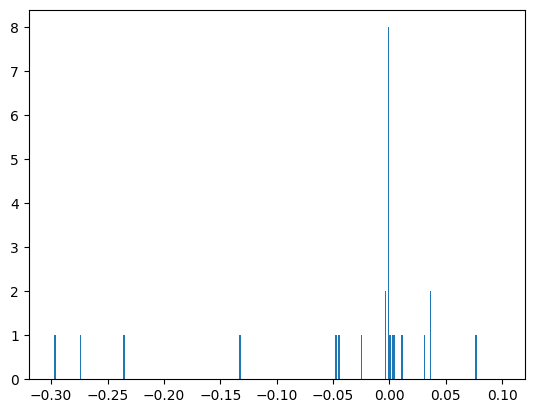

In [23]:
# print distribution of the coefficients in a histogram
import matplotlib.pyplot as plt
plt.hist(model.coef_[1], bins=300, range=(-0.3, 0.1))
plt.show()

In [24]:
# top 10 features
from src.extract_features import feature_names
names = feature_names()
len(names)

67

In [25]:
# show the top 10 features
import numpy as np
k=5
# model 0
model0_names = [names[i] for i in np.argsort(model.coef_[0])]
# model 1
model1_names = [names[i] for i in np.argsort(model.coef_[1])]
# model 2
model2_names = [names[i] for i in np.argsort(model.coef_[2])]

print(model0_names[-k:])
print(model1_names[-k:])
print(model2_names[-k:])


['paragraph_count', 'amod', 'xcomp', 'ends_with_concluding_phrase', 'char_count']
['csubj', 'punctuation_ratio', 'avg_dependency_distance', 'pos_ADJ_ratio', 'transition_word_density_per_sent']
['pos_INTJ_ratio', 'ROOT', 'ccomp', 'ttr', 'avg_sentence_length_tokens']


In [16]:
np.sort(model.coef_[0])[-5:]

array([0.10552454, 0.11222161, 0.11435377, 0.12562852, 0.17893294])

In [1]:
print("\nLoading model for prediction example...")
import joblib

MODEL_SAVE_PATH = "/data2/xianglin/data/preference_leakage/bow_classifier_LogisticRegression.joblib"
VECTORIZER_SAVE_PATH = "/data2/xianglin/data/preference_leakage/bow_vectorizer_tfidf_ngram2_maxf20000.joblib"

loaded_classifier = joblib.load(MODEL_SAVE_PATH)
loaded_vectorizer = joblib.load(VECTORIZER_SAVE_PATH)
new_texts = [""]
new_texts_vec = loaded_vectorizer.transform(new_texts)

predictions = loaded_classifier.predict(new_texts_vec)
print(f"Predictions for new texts: {predictions}")


Loading model for prediction example...
Predictions for new texts: [0]
